# BeyondStats:
##### William Yammine, Sabina Bacaoanu, Hibba Kamas

### 1) Load cleaned dataset

We begin by loading the cleaned dataset (`df_keep.csv`) into a Pandas DataFrame. This file contains preprocessed country-level gender inequality indicators across multiple years and serves as the base input for all further transformations and modeling.


In [ ]:
import pandas as pd
df_keep = pd.read_csv("df_keep.csv")

**Column check:** The dataset includes identifier fields (`Country Code`, `Indicator Code`) and year columns formatted as digit-only strings (e.g., "1960"…"2024"). This allows reliable detection of year columns for reshaping into a country–year panel dataset.

In [ ]:
df_keep.head()
df_keep.shape
df_keep.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

### 2) Identify year columns

We programmatically identify all columns that represent years by selecting column names that are numeric. These columns contain the time‑series values for each indicator and will be reshaped for panel analysis.

In [ ]:
year_cols = [c for c in df_keep.columns if str(c).isdigit()]
print(year_cols)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


### 3) Select identifier and year columns

We retain only the country identifier, indicator identifier, and yearly values. This removes descriptive metadata and reduces the dataset to the fields required for reshaping and modeling.

In [ ]:
base_cols = ["Country Code", "Indicator Code"]
dfw = df_keep[base_cols + year_cols].copy()

### 4) Reshape data into long (panel) format

The dataset is transformed from wide format to long format, producing one row per country, indicator, and year. This structure is required for constructing country–year feature matrices and downstream machine learning models.

In [ ]:
long = dfw.melt(
    id_vars=base_cols,
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)
long["year"] = long["year"].astype(int)
long.head()

,Country Code,Indicator Code,year,value
0,AFG,SG.REM.RIGT.EQ,1960,NaN
1,AFG,SH.HIV.ARTC.FE.ZS,1960,NaN
2,AFG,SE.PRM.TENR,1960,NaN
3,AFG,SE.PRM.TENR.FE,1960,NaN
4,AFG,SE.PRM.TENR.MA,1960,NaN


### 5) Construct country–year feature matrix

We pivot the long-format data into a country–year panel where each row represents a country in a given year and each column corresponds to an indicator. This matrix forms the feature input (X) for machine learning models.

In [ ]:
X_panel = (
    long.dropna(subset=["value"])
        .pivot_table(
            index=["Country Code", "year"],
            columns="Indicator Code",
            values="value",
            aggfunc="last"
        )
)
X_panel.head()

Indicator Code     IC.REG.COST.PC.FE.ZS  IC.REG.DURS.FE  IC.REG.PROC.FE  \
Country Code year                                                         
ABW          1960                   NaN             NaN             NaN   
             1961                   NaN             NaN             NaN   
             1962                   NaN             NaN             NaN   
             1963                   NaN             NaN             NaN   
             1964                   NaN             NaN             NaN   

Indicator Code     IT.NET.USER.FE.ZS  IT.NET.USER.ZS  SE.ADT.1524.LT.FE.ZS  \
Country Code year                                                            
ABW          1960                NaN             NaN                   NaN   
             1961                NaN             NaN                   NaN   
             1962                NaN             NaN                   NaN   
             1963                NaN             NaN                   NaN   
             1964                NaN             NaN                   NaN   

Indicator Code     SE.ADT.1524.LT.FM.ZS  SE.ADT.1524.LT.MA.ZS  \
Country Code year                                               
ABW          1960                   NaN                   NaN   
             1961                   NaN                   NaN   
             1962                   NaN                   NaN   
             1963                   NaN                   NaN   
             1964                   NaN                   NaN   

Indicator Code     SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  ...  UIS.GTVP.3.V.F  \
Country Code year                                        ...                   
ABW          1960                NaN                NaN  ...             NaN   
             1961                NaN                NaN  ...             NaN   
             1962                NaN                NaN  ...             NaN   
             1963                NaN                NaN  ...             NaN   
             1964                NaN                NaN  ...             NaN   

Indicator Code     UIS.GTVP.3.V.M  UIS.GTVP.4.V  UIS.GTVP.4.V.F  \
Country Code year                                                 
ABW          1960             NaN           NaN             NaN   
             1961             NaN           NaN             NaN   
             1962             NaN           NaN             NaN   
             1963             NaN           NaN             NaN   
             1964             NaN           NaN             NaN   

Indicator Code     UIS.GTVP.4.V.M  UIS.LP.AG15T24.F  UIS.LPP.AG15T24  \
Country Code year                                                      
ABW          1960             NaN               NaN              NaN   
             1961             NaN               NaN              NaN   
             1962             NaN               NaN              NaN   
             1963             NaN               NaN              NaN   
             1964             NaN               NaN              NaN   

Indicator Code     UIS.ROFST.3.F.CP  UIS.ROFST.3.M.CP  VC.IHR.PSRC.FE.P5  
Country Code year                                                         
ABW          1960               NaN               NaN                NaN  
             1961               NaN               NaN                NaN  
             1962               NaN               NaN                NaN  
             1963               NaN               NaN                NaN  
             1964               NaN               NaN                NaN  

[5 rows x 291 columns]

### 6) Load and reshape the inequality index target (GII)

We load a Gender Inequality Index (GII) dataset and reshape it into a long format with one row per country–year. We then extract the year from the original column names and keep only valid (non-missing) GII values. This produces the target variable (y) aligned to the same country–year structure as our feature matrix.

In [ ]:
gii = pd.read_csv("Inequality_index.csv")

gii_cols = [c for c in gii.columns if "Gender Inequality Index" in c]

gii_long = gii.melt(id_vars=["ISO3"], value_vars=gii_cols,
                    var_name="gii_col", value_name="gii")

gii_long["year"] = gii_long["gii_col"].str.extract(r"\((\d{4})\)").astype(int)
gii_long = gii_long.drop(columns=["gii_col"]).dropna(subset=["gii"])

gii_long.head()

,ISO3,gii,year
1,AGO,0.725,1990
4,ARE,0.659,1990
5,ARG,0.442,1990
6,ARM,0.470,1990
8,AUS,0.185,1990


**Target coverage:** The Gender Inequality Index labels span 1990–2021, so our supervised training dataset is restricted to country–year pairs within this range where both indicators and GII labels exist.

In [ ]:
gii_long["year"].min(), gii_long["year"].max()

(1990, 2021)

### 7) Join features with labels (country–year alignment)

We construct the supervised learning dataset by merging our indicator feature matrix (X) with the Gender Inequality Index (GII) labels (y) on matching country codes and years. We use an inner join to keep only country–year pairs where both indicator values and GII targets are available, producing the final training table used for modeling.

In [ ]:
data = (X_panel.reset_index()
        .merge(gii_long, left_on=["Country Code","year"], right_on=["ISO3","year"], how="inner")
        .drop(columns=["ISO3"]))

data.shape, data[["Country Code","year","gii"]].head()

((4889, 294),
   Country Code  year    gii
 0          AFG  2005  0.748
 1          AFG  2006  0.749
 2          AFG  2007  0.752
 3          AFG  2008  0.755
 4          AFG  2009  0.755)

We inspect the final merged dataset to confirm the number of unique countries, years, and total country–year observations. This step ensures that the supervised learning table has sufficient temporal and geographic coverage before model training.

In [ ]:
print("Countries:", data["Country Code"].nunique())
print("Years:", data["year"].nunique())
print("Rows:", len(data))

Countries: 170
Years: 32
Rows: 4889


### 8) Load the manual feature dictionary

We import a manually curated feature dictionary that maps each indicator to its name, wellbeing front (Economic/Social/Physical), direction (Higher/Lower), and whether the indicator should be included in our analysis. This ensures interpretability and keeps feature selection consistent with the platform design.

In [ ]:
df_labeled = pd.read_csv("features.csv", sep=";")
df_labeled.head()

,Indicator Code,Indicator Name,Front,Direction,Gap
0,IC.REG.COST.PC.FE.ZS,"Cost of business start-up procedures, female (...",Economic,Lower,0
1,IC.REG.DURS.FE,"Time required to start a business, female (days)",Economic,Lower,0
2,IC.REG.PROC.FE,"Start-up procedures to register a business, fe...",Economic,Lower,0
3,IT.NET.USER.FE.ZS,"Individuals using the Internet, female (% of f...",Economic,Higher,0
4,IT.NET.USER.ZS,Individuals using the Internet (% of population),Economic,Higher,0


We clean the feature dictionary by standardizing column names and text formatting, and removing any accidental row-number prefixes. This prevents mismatches when joining the dictionary to the main dataset.

In [ ]:
# make column names clean
df_labeled.columns = [c.strip() for c in df_labeled.columns]

# strip leading row numbers if they exist (e.g. "2 IC.REG...")
df_labeled["Indicator Code"] = (
    df_labeled["Indicator Code"].astype(str)
    .str.replace(r"^\s*\d+\s+", "", regex=True)
)

# normalize text fields (Front/Direction)
df_labeled["Front"] = df_labeled["Front"].astype(str).str.strip().str.title()
df_labeled["Direction"] = df_labeled["Direction"].astype(str).str.strip().str.title()

We keep only the indicators marked for inclusion in the feature dictionary. This step defines the final set of variables used to build the modeling dataset.

In [ ]:
use_col = "Gap"

df_use = df_labeled[df_labeled[use_col].astype(int) == 1].copy()
df_use.shape

(152, 5)

Before assembling the modeling dataset, we verify that each selected indicator code exists as a column in the merged data table. Any missing indicators are reported for review.

In [ ]:
selected_codes = df_use["Indicator Code"].tolist()
found_codes = [c for c in selected_codes if c in data.columns]
missing_codes = sorted(set(selected_codes) - set(found_codes))

print("Selected indicators:", len(selected_codes))
print("Found in data:", len(found_codes))
print("Missing from data:", len(missing_codes))
missing_codes[:25]

Selected indicators: 152
Found in data: 152
Missing from data: 0


[]

We construct the feature dataset by combining identifiers (Country Code, year), the target variable (GII), and the selected indicator columns. This produces the final country–year table used for sector scoring and modeling.

In [ ]:
df_features = data[["Country Code", "year", "gii"]].copy()
df_features = df_features.join(data[found_codes])

df_features.shape

(4889, 155)

### 9) Construct Gender Gaps and Define Weights

To transform raw gender-disaggregated indicators into meaningful measures of inequality, we construct gender-inequality signals that follow a single, consistent convention:

Higher engineered values always indicate worse gender inequality.

This ensures that all indicators can be aggregated and compared coherently.

1). Selecting Valid Indicators

We begin by filtering the indicator mapping table, retaining only indicators explicitly marked as valid inequality signals (Gap = 1). Indicators that represent demographic composition or pre-computed ratios are excluded, as they do not directly measure inequality or would introduce redundancy.

This step ensures that only conceptually meaningful indicators contribute to the model.

2). Constructing Gender-Inequality Signals

We generate two types of inequality signals depending on data availability.

A) Gender gap signals (primary indicators)
When both female and male versions of an indicator exist, inequality is measured as the difference between female and male values (
𝐹
−
𝑀
). The indicator’s Direction metadata is then used to align the signal with the common interpretation that higher values correspond to worse inequality:

* If higher values are desirable, the gap is inverted.
* If lower values are desirable, the gap is kept as is.
* If a middle value is optimal, the absolute gap is used.

B) Female-only signals (secondary indicators)
When no male counterpart exists, the female indicator is retained as a one-sided measure of inequality. Direction metadata is again applied to ensure consistent interpretation, with deviations from the typical or median value treated as worse outcomes when a middle value is optimal.

All resulting signals are stored in the feature matrix df_signals.

3). Weighting by Wellbeing Sector

Each engineered signal is assigned to a wellbeing sector (Economic, Social, or Physical) using the Front classification. Within each sector, weights are defined such that:

Gender gap indicators collectively account for 75% of the sector score.

Female-only indicators account for the remaining 25%.

Weights within each sector are normalized to sum to one, reflecting the stronger evidential value of direct gender comparisons while still preserving important one-sided indicators.

In [ ]:
import numpy as np
import pandas as pd

# --- Load template mapping (Front + Direction + Gap flag) ---
m = pd.read_csv("features.csv", sep=";")
df_labeled.head()

# Keep only mapping rows that are marked 1
m = m[m["Gap"] == 1].copy()

# Restrict to columns that exist in df_features
ID_COLS = ["Country Code", "year", "gii"]
indicator_cols = [c for c in df_features.columns if c not in ID_COLS]
m = m[m["Indicator Code"].isin(indicator_cols)].copy()

front = dict(zip(m["Indicator Code"], m["Front"]))         # Economic / Social / Physical
direction = dict(zip(m["Indicator Code"], m["Direction"])) # Higher / Lower / Middle
name = dict(zip(m["Indicator Code"], m["Indicator Name"]))

# --- Explicit exclusions (decisive) ---
EXCLUDED = {
    "SL.UEM.1524.FM.ZS",  # derived female/male ratio -> exclude
    "SP.DYN.CBRT.IN",     # population-level crude birth rate -> exclude
    "SP.URB.TOTL.FE.ZS",  # demographic composition -> exclude
}
usable = [c for c in indicator_cols if c in front and c not in EXCLUDED]

# --- Pair detection (Female ↔ Male) ---
def male_counterpart(code: str) -> str | None:
    if ".FE." in code: return code.replace(".FE.", ".MA.")
    if code.endswith(".FE"): return code[:-3] + ".MA"
    if code.endswith(".FE.ZS"): return code[:-6] + ".MA.ZS"
    if code.endswith(".FE.IN"): return code[:-6] + ".MA.IN"
    if code.endswith(".F.CP"): return code[:-5] + ".M.CP"
    if code.endswith(".F"): return code[:-2] + ".M"
    if ".F." in code: return code.replace(".F.", ".M.")
    return None

usable_set = set(usable)
pairs = []
used = set()
for c in usable:
    if c in used:
        continue
    mc = male_counterpart(c)
    if mc and mc in usable_set:
        f, ma = c, mc
        # ensure f is female-coded
        if ".MA." in f or f.endswith(".MA") or f.endswith(".MA.ZS") or f.endswith(".MA.IN") or f.endswith(".M") or f.endswith(".M.CP") or ".M." in f:
            f, ma = ma, f
        pairs.append((f, ma))
        used.update([f, ma])

female_only = [c for c in usable if c not in used]

# --- Construct "gender inequality signals" with convention: higher = worse inequality ---
signals = {}

# GAP signals: raw_gap = Female - Male, then enforce direction using template's Direction
for f, ma in pairs:
    raw_gap = df_features[f] - df_features[ma]  # Female − Male (hard rule)

    d = direction.get(f, "Higher")
    if d == "Higher":
        # higher indicator = better -> women lower is worse -> flip
        sig = -raw_gap
    elif d == "Lower":
        # lower indicator = better -> women higher is worse -> keep
        sig = raw_gap
    else:  # Middle
        # "middle is best" / composition-type -> separation magnitude
        sig = raw_gap.abs()

    signals[f"GAP__{f}__MINUS__{ma}"] = sig

# Female-only signals: use Direction to enforce higher=worse
for c in female_only:
    x = df_features[c]
    d = direction.get(c, "Higher")
    if d == "Higher":
        sig = -x                  # higher = better -> flip
    elif d == "Lower":
        sig = x                   # higher = worse -> keep
    else:  # Middle
        sig = (x - x.median(skipna=True)).abs()
    signals[f"FEMONLY__{c}"] = sig

df_signals = pd.DataFrame(signals, index=df_features.index)

# --- Define weights per sector (gap > female-only), weights sum to 1 in each sector ---
# Total weight split (decisive):
GAP_TOTAL = 0.75
FEMONLY_TOTAL = 0.25

def sector_of_feature(feat: str) -> str:
    # parse original code inside engineered feature name
    if feat.startswith("GAP__"):
        code = feat.split("__")[1]
    else:
        code = feat.split("__")[1]
    return front[code]  # Economic / Social / Physical

def make_weights_for_sector(sector: str) -> pd.Series:
    feats = [f for f in df_signals.columns if sector_of_feature(f) == sector]
    gap_feats = [f for f in feats if f.startswith("GAP__")]
    fem_feats = [f for f in feats if f.startswith("FEMONLY__")]

    if len(gap_feats) == 0 and len(fem_feats) == 0:
        return pd.Series(dtype=float)

    if len(fem_feats) == 0:
        return pd.Series({f: 1.0/len(gap_feats) for f in gap_feats})
    if len(gap_feats) == 0:
        return pd.Series({f: 1.0/len(fem_feats) for f in fem_feats})

    w = {}
    for f in gap_feats:
        w[f] = GAP_TOTAL / len(gap_feats)
    for f in fem_feats:
        w[f] = FEMONLY_TOTAL / len(fem_feats)

    w = pd.Series(w)
    return w / w.sum()  # safety normalize to sum=1

w_econ = make_weights_for_sector("Economic")
w_soc  = make_weights_for_sector("Social")
w_phy  = make_weights_for_sector("Physical")

### 10) Standardization and Sector Scores

All engineered gender inequality signals are standardized using z-scores to ensure indicators with different scales contribute comparably. Missing values are filled with zero after standardization, representing a neutral effect.

Sector-level inequality scores (Economic, Social, Physical) are then computed as weighted sums of the standardized indicators, with weights summing to one within each sector. Higher scores indicate worse gender inequality.

In [ ]:
# --- Standardize signals so weights are comparable ---
# Otherwise an indicator with big numeric scale dominates.
dfZ = (df_signals - df_signals.mean()) / df_signals.std(ddof=0)

# Fill remaining NaNs with 0 after standardization (means "neutral" signal)
dfZ = dfZ.fillna(0)

# --- Sector scores ---
df_features["ineq_econ"] = dfZ[w_econ.index].mul(w_econ, axis=1).sum(axis=1) if len(w_econ) else 0.0
df_features["ineq_soc"]  = dfZ[w_soc.index].mul(w_soc, axis=1).sum(axis=1)  if len(w_soc)  else 0.0
df_features["ineq_phy"]  = dfZ[w_phy.index].mul(w_phy, axis=1).sum(axis=1)  if len(w_phy)  else 0.0

The overall gendered wellbeing index is computed as the simple average of the three sector-level inequality scores (Economic, Social, and Physical), assigning equal weight to each sector. This reflects a neutral assumption that all wellbeing dimensions contribute equally to overall gender inequality.

Higher values indicate worse overall gendered wellbeing outcomes.

In [ ]:
# equal sector weights (decisive default)
df_features["ineq_overall"] = (
    1/3 * df_features["ineq_econ"] +
    1/3 * df_features["ineq_soc"]  +
    1/3 * df_features["ineq_phy"]
)

For each country–year, the contribution of individual indicators to the inequality score is computed as the product of the standardized indicator value and its assigned weight. Indicators are then ranked by their contribution, allowing identification of the top drivers of gender inequality overall or within a specific sector.

This enables transparent interpretation of model results and supports targeted, policy-relevant recommendations.

In [ ]:
def top_drivers(row_idx, sector=None, k=5):
    if sector is None:
        feats = dfZ.columns
        weights = pd.concat([w_econ, w_soc, w_phy])
    else:
        weights = {"Economic": w_econ, "Social": w_soc, "Physical": w_phy}[sector]
        feats = weights.index

    contrib = dfZ.loc[row_idx, feats] * weights
    contrib = contrib.sort_values(ascending=False)
    return contrib.head(k)

# example: top drivers for a specific row
idx = df_features.index[0]
print(top_drivers(idx, sector="Economic", k=5))

GAP__SL.TLF.ACTI.1524.FE.ZS__MINUS__SL.TLF.ACTI.1524.MA.ZS    0.107611
GAP__SL.EMP.1524.SP.FE.ZS__MINUS__SL.EMP.1524.SP.MA.ZS        0.106913
GAP__SL.EMP.TOTL.SP.FE.ZS__MINUS__SL.EMP.TOTL.SP.MA.ZS        0.106532
FEMONLY__SL.TLF.CACT.FM.ZS                                    0.093582
FEMONLY__SG.IHT.ASST.EQ                                       0.055838
dtype: float64


To improve interpretability, engineered feature codes are mapped back to human-readable indicator names. Gap-based features are described as female–male differences, while female-only indicators are explicitly labeled as such. This allows the top contributing drivers of gender inequality to be presented in an intuitive and policy-relevant format.

In [ ]:
def describe_feature(feat):
    # feat is like "GAP__SE.SEC.ENRR.FE__MINUS__SE.SEC.ENRR.MA"
    if feat.startswith("GAP__"):
        parts = feat.split("__")
        f = parts[1]
        ma = parts[3]
        return f"{name.get(f,f)} (Female − Male gap vs {name.get(ma,ma)})"
    else:
        code = feat.split("__")[1]
        return f"{name.get(code,code)} (female-only)"

# show readable top drivers
drivers = top_drivers(idx, sector="Economic", k=5)
[(describe_feature(f), float(v)) for f,v in drivers.items()]


[('Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate) (Female − Male gap vs Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate))',
  0.10761146091218994),
 ('Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate) (Female − Male gap vs Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate))',
  0.10691294595677561),
 ('Employment to population ratio, 15+, female (%) (modeled ILO estimate) (Female − Male gap vs Employment to population ratio, 15+, male (%) (modeled ILO estimate))',
  0.10653201871817791),
 ('Ratio of female to male labor force participation rate (%) (modeled ILO estimate) (female-only)',
  0.09358225196451167),
 ('Male and female surviving spouses have equal rights to inherit assets (1=yes; 0=no) (female-only)',
  0.0558379730270592)]

### 11) Model Training Setup and Data Splitting

The engineered gender inequality signals are used as model inputs, with the Gender Inequality Index (GII) as the prediction target. Observations with missing GII values are removed.

To prevent data leakage across time, the dataset is split into training and test sets using a group-based strategy by country. This ensures that all observations from a given country appear exclusively in either the training or test set, enabling a realistic evaluation of model generalization.

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# X: engineered signals
X = df_signals.copy()

# y: GII
y = df_features["gii"]

# keep rows where we have a target
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# group split by country to avoid leakage (same country in train & test)
groups = df_features.loc[mask, "Country Code"]

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

A Random Forest regressor is trained to predict the Gender Inequality Index (GII) from the engineered gendered wellbeing signals. Missing feature values are handled using median imputation within a pipeline to prevent data leakage.

Model performance is evaluated on the held-out test set using Mean Absolute Error (MAE) and the coefficient of determination (R²), providing a quantitative assessment of predictive accuracy and explained variance.

In [ ]:
rf = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(
        n_estimators=400,
        random_state=42,
        n_jobs=-1,
        min_samples_leaf=3
    ))
])

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, pred)
r2  = r2_score(y_test, pred)

print("RandomForest MAE:", mae)
print("RandomForest R2 :", r2)


RandomForest MAE: 0.044134996069655805
RandomForest R2 : 0.8943147642455316


A simple baseline model is constructed using a Dummy Regressor that always predicts the mean GII value. This baseline provides a reference point for evaluating whether the Random Forest model learns meaningful patterns beyond trivial predictions.

Performance is assessed using MAE and R² on the same test set, allowing direct comparison with the trained model.

In [ ]:
from sklearn.dummy import DummyRegressor

dummy = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("dummy", DummyRegressor(strategy="mean"))
])

dummy.fit(X_train, y_train)
pred0 = dummy.predict(X_test)

print("Baseline MAE:", mean_absolute_error(y_test, pred0))
print("Baseline R2 :", r2_score(y_test, pred0))


Baseline MAE: 0.16646673357131395
Baseline R2 : -0.08914272393514677


A scatter plot of predicted versus true GII values is used to visually assess model performance. Points closer to the diagonal indicate more accurate predictions, while systematic deviations would suggest bias or underfitting.

This visualization complements quantitative metrics by illustrating how well the model captures the overall relationship between gendered wellbeing signals and GII.

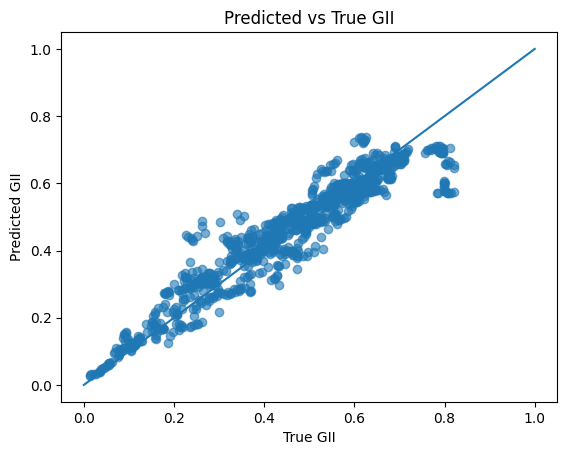

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, pred, alpha=0.6)
plt.xlabel("True GII")
plt.ylabel("Predicted GII")
plt.title("Predicted vs True GII")
plt.plot([0,1],[0,1])
plt.show()


### 12) Model Evaluation Setup

To evaluate model performance and detect overfitting or data leakage, group-aware cross-validation and appropriate regression metrics are used. Mean Absolute Error (MAE) is selected as the primary error metric, alongside R² to measure explained variance.

A custom MAE scorer is defined to support cross-validation procedures.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GroupShuffleSplit, GroupKFold, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.base import clone

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

### 14) Data Leakage Diagnostic: Random vs. Grouped Split

To assess potential data leakage, model performance is compared under two train–test splitting strategies. First, a random split is applied, which allows observations from the same country to appear in both training and test sets and may therefore introduce leakage. Second, a group-based split by country is used, ensuring strict separation between training and test data.

A substantial performance drop when using the grouped split indicates that the random split was exploiting country-level similarities rather than true generalizable patterns, confirming the necessity of group-aware evaluation.

In [ ]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.base import clone
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Use a lighter model for diagnostics (faster)
rf_diag = clone(rf)
# If your pipeline has rf named_steps, you can reduce trees:
try:
    rf_diag.named_steps["rf"].set_params(n_estimators=150)
except Exception:
    pass

# --- A) LEAKY split (WRONG): random split across all rows ---
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

m1 = clone(rf_diag)
m1.fit(X_tr, y_tr)
pred = m1.predict(X_te)

print("RANDOM split (leaky-ish): MAE =", mean_absolute_error(y_te, pred),
      "R2 =", r2_score(y_te, pred))

# --- B) GROUP split (RIGHT): countries separated ---
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tr_idx, te_idx = next(gss.split(X, y, groups=groups))

m2 = clone(rf_diag)
m2.fit(X.iloc[tr_idx], y.iloc[tr_idx])
pred2 = m2.predict(X.iloc[te_idx])

print("GROUP split (correct):    MAE =", mean_absolute_error(y.iloc[te_idx], pred2),
      "R2 =", r2_score(y.iloc[te_idx], pred2))

RANDOM split (leaky-ish): MAE = 0.012728571612112282 R2 = 0.9885017443697853
GROUP split (correct):    MAE = 0.044255802411844826 R2 = 0.8934834722719966


Model performance is compared between the training and test sets using MAE and R² to assess overfitting. A noticeable but controlled gap between training and test performance indicates mild overfitting, which is expected for ensemble models such as Random Forests, while strong test performance confirms good generalization and no underfitting.

In [ ]:
pred_tr = m2.predict(X.iloc[tr_idx])

print("TRAIN: MAE =", mean_absolute_error(y.iloc[tr_idx], pred_tr),
      "R2 =", r2_score(y.iloc[tr_idx], pred_tr))

print("TEST : MAE =", mean_absolute_error(y.iloc[te_idx], pred2),
      "R2 =", r2_score(y.iloc[te_idx], pred2))


TRAIN: MAE = 0.0054467117024271615 R2 = 0.9973547542350952
TEST : MAE = 0.044255802411844826 R2 = 0.8934834722719966


A strict shuffled-target test is performed by randomly permuting the GII values across all observations, fully destroying the relationship between features and the target. The model is then retrained and evaluated on the same group-based split.

The resulting collapse in predictive performance confirms that the original model performance is driven by genuine signal in the data rather than data leakage or memorization.

In [ ]:
y_shuf_strict = y.sample(frac=1.0, random_state=42).values
y_shuf_strict = pd.Series(y_shuf_strict, index=y.index)

m4 = clone(rf_diag)
m4.fit(X.iloc[tr_idx], y_shuf_strict.iloc[tr_idx])
pred4 = m4.predict(X.iloc[te_idx])

print(
    "STRICT shuffled target:",
    "MAE =", mean_absolute_error(y_shuf_strict.iloc[te_idx], pred4),
    "R2 =", r2_score(y_shuf_strict.iloc[te_idx], pred4)
)


STRICT shuffled target: MAE = 0.17279529062883525 R2 = -0.01057532911474457


### 15) Build App-Ready Scores (Sector + Overall ML Score)

This section produces the **final outputs used in the website**. For each **country–year**, we generate:

* **Economic score**
* **Social score**
* **Physical score**
* **Overall score** (from the ML model as **predicted GII**)

We z-score all engineered signals (`df_signals`) so indicators with different units/scales are comparable and no single indicator dominates due to magnitude.

For each sector (Economic/Social/Physical), we compute a **weighted average** of the standardized signals. If some indicators are missing in a country–year, we **renormalize the weights** over the available indicators so the score remains comparable across rows. Rows with no available indicators in a sector are assigned **0** (neutral).

In [ ]:
import numpy as np
import pandas as pd

# 1) Standardize signals (z-score) so different scales are comparable
dfZ = (df_signals - df_signals.mean()) / df_signals.std(ddof=0)

# 2) Weighted score per row, renormalizing weights to available (non-NaN) signals
def weighted_row_score(dfZ: pd.DataFrame, weights: pd.Series) -> pd.Series:
    if weights is None or len(weights) == 0:
        return pd.Series(0.0, index=dfZ.index)

    cols = [c for c in weights.index if c in dfZ.columns]
    if len(cols) == 0:
        return pd.Series(0.0, index=dfZ.index)

    X = dfZ[cols]
    w = weights[cols]

    mask = X.notna()
    num = (X.fillna(0).mul(w, axis=1)).sum(axis=1)          # weighted sum of available
    den = (mask.mul(w, axis=1)).sum(axis=1)                 # total available weight
    return num / den.replace(0, np.nan)                      # avoid divide-by-zero

# 3) Sector scores (one value per row = country-year)
df_features["ineq_econ"] = weighted_row_score(dfZ, w_econ)
df_features["ineq_soc"]  = weighted_row_score(dfZ, w_soc)
df_features["ineq_phy"]  = weighted_row_score(dfZ, w_phy)

# (optional) fill rows with no coverage in a sector
df_features[["ineq_econ","ineq_soc","ineq_phy"]] = df_features[["ineq_econ","ineq_soc","ineq_phy"]].fillna(0)

The overall score used in the app is the **model’s prediction of GII**:

* `gii_pred = rf.predict(df_signals)`
  Optionally, we compute an error term (`gii_error`) when true GII is available for comparison.

In [ ]:
# overall score comes from ML model
X_all = df_signals.copy()
df_features["gii_pred"] = rf.predict(X_all)

# optional: residual if true gii exists
if "gii" in df_features.columns:
    df_features["gii_error"] = df_features["gii_pred"] - df_features["gii"]

We export a single table with:
`Country Code`, `year`, `ineq_econ`, `ineq_soc`, `ineq_phy`, `gii_pred` (and optionally `gii_true`).

In [ ]:
app_table = df_features[[
    "Country Code", "year",
    "ineq_econ", "ineq_soc", "ineq_phy",
    "gii_pred"
]].copy()

# include true gii only if you want a compare toggle in UI
if "gii" in df_features.columns:
    app_table["gii_true"] = df_features["gii"]

app_table.to_csv("app_scores_country_year.csv", index=False)

To make the scores easier to display and compare in the frontend, we min–max scale each score to a 0–100 range:

* `econ_0_100`, `soc_0_100`, `phy_0_100`, `overall_0_100`
  where higher values represent worse outcomes under the model’s convention.

In [ ]:
def to_0_100(s: pd.Series) -> pd.Series:
    mn, mx = s.min(), s.max()
    if mx == mn:
        return pd.Series(50.0, index=s.index)
    return 100 * (s - mn) / (mx - mn)

app_table["econ_0_100"]   = to_0_100(app_table["ineq_econ"])
app_table["soc_0_100"]    = to_0_100(app_table["ineq_soc"])
app_table["phy_0_100"]    = to_0_100(app_table["ineq_phy"])
app_table["overall_0_100"] = to_0_100(app_table["gii_pred"])  # ML-based overall

### 16) Future GII Forecasting (2022–2026) and Export for the App

This section generates **future country–year predictions (2022–2024)** by training the model on historical years where GII is available (≤2021) and applying it to later years where the predictor indicators exist.

1). Preserve future years via left join

We merge the feature panel with GII using a **left join** so that country–year rows remain in the dataset even when GII is missing (e.g., 2022–2026). This creates the correct structure for out-of-sample forecasting.

2). Train the model on historical data only

A Random Forest regressor (with median imputation) is trained using only country–year observations where GII is observed (≤2021). This prevents target leakage and ensures the model learns relationships from past data.

3). Predict GII for 2022–2026

For all rows in years 2022–2026, we generate **`gii_pred`** using the trained model. These predictions serve as the app’s **overall score** for future years.

4). Compute sector scores for context (Economic/Social/Physical)

Using the indicator-to-sector mapping (`Front`), feature columns are grouped into Economic, Social, and Physical sets. Features are standardized (z-score), and each sector score is computed as the mean of the standardized indicators available for that sector. This provides interpretable dimension-level scores alongside the overall prediction.

5). Export future table for deployment

Finally, we export an app-ready table containing `Country Code`, `year`, the three sector scores, and the overall predicted score for 2022–2026.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# ---------- 0) Build panel with LEFT join so future years remain ----------
X_panel_reset = X_panel.reset_index()

data_all = (
    X_panel_reset
      .merge(gii_long, left_on=["Country Code","year"], right_on=["ISO3","year"], how="left")
      .drop(columns=["ISO3"])
)

data_all["year"] = pd.to_numeric(data_all["year"], errors="coerce").astype(int)
data_all["gii"]  = pd.to_numeric(data_all["gii"], errors="coerce")

ID_COLS = ["Country Code","year"]
TARGET  = "gii"

# ---------- 1) Define feature columns automatically ----------
# Keep numeric columns except IDs and target
candidate_cols = [c for c in data_all.columns if c not in ID_COLS + [TARGET]]
feat_cols = [c for c in candidate_cols if pd.api.types.is_numeric_dtype(data_all[c])]

if len(feat_cols) == 0:
    raise ValueError("No numeric feature columns found in X_panel after merge.")

X = data_all[feat_cols]
y = data_all[TARGET]

# ---------- 2) Train on years where GII exists (<=2021) ----------
train_mask = y.notna() & (data_all["year"] <= 2021)

rf = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(
        n_estimators=400,
        random_state=42,
        n_jobs=-1,
        min_samples_leaf=3
    ))
])
rf.fit(X.loc[train_mask], y.loc[train_mask])

# ---------- 3) Predict future GII for 2022–2026 ----------
future_mask = data_all["year"].between(2022, 2026)
if future_mask.sum() == 0:
    raise ValueError("No rows for 2022–2026 exist in X_panel. Check year coverage in X_panel.")

data_all.loc[future_mask, "gii_pred"] = rf.predict(X.loc[future_mask])

# ---------- 4) Compute sector scores from features using mapping m ----------

# Prepare mapping
m_use = m.copy()
if "Gap" in m_use.columns:
    m_use = m_use[m_use["Gap"] == 1].copy()

# Normalize front labels to avoid mismatch
m_use["Front"] = m_use["Front"].astype(str).str.strip().str.lower()

front = dict(zip(m_use["Indicator Code"], m_use["Front"]))  # economic/social/physical

# Sector feature lists: only features that exist in data
econ_feats = [c for c in feat_cols if front.get(c) == "economic"]
soc_feats  = [c for c in feat_cols if front.get(c) == "social"]
phy_feats  = [c for c in feat_cols if front.get(c) == "physical"]

print("Features by sector:", {"econ": len(econ_feats), "soc": len(soc_feats), "phy": len(phy_feats)})

# Standardize within each feature so scales don't dominate
Z = (data_all[feat_cols] - data_all[feat_cols].mean()) / data_all[feat_cols].std(ddof=0)

def sector_score(Z, cols):
    if len(cols) == 0:
        return pd.Series(0.0, index=Z.index)
    # mean of standardized available indicators (ignoring NaNs)
    return Z[cols].mean(axis=1, skipna=True).fillna(0.0)

data_all["ineq_econ"] = sector_score(Z, econ_feats)
data_all["ineq_soc"]  = sector_score(Z, soc_feats)
data_all["ineq_phy"]  = sector_score(Z, phy_feats)

# Overall for app = ML-predicted GII
data_all["overall_score"] = data_all["gii_pred"]

# ---------- 5) Export app table for 2022–2026 ----------
app_future = data_all.loc[future_mask, [
    "Country Code","year",
    "ineq_econ","ineq_soc","ineq_phy",
    "overall_score"
]].copy()

app_future.to_csv("app_future_2022_2026.csv", index=False)

print("Done.")
print("Year coverage:", data_all["year"].min(), "→", data_all["year"].max())
print("Train rows (<=2021 with GII):", int(train_mask.sum()))
print("Future rows (2022–2026):", int(future_mask.sum()))
print("Exported:", app_future.shape, "→ app_future_2022_2026.csv")

app_future.head()

Features by sector: {'econ': 46, 'soc': 71, 'phy': 35}
✅ Done.
Year coverage: 1960 → 2024
Train rows (<=2021 with GII): 4889
Future rows (2022–2026): 651
Exported: (651, 6) → app_future_2022_2026.csv


,Country Code,year,ineq_econ,ineq_soc,ineq_phy,overall_score
62,ABW,2022,0.000000,1.019683,-0.223691,0.362104
63,ABW,2023,0.000000,0.587241,-0.223838,0.362521
64,ABW,2024,0.000000,0.485748,0.000000,0.421591
127,AFG,2022,-0.246013,-0.677091,0.309678,0.672782
128,AFG,2023,-0.246754,0.130174,0.290026,0.669739
